# Outliers analysis

- If some outliers are detecting anamoly pattern such as fraud detection then outliers are important

- If outliers are  due to mechanical error, measurement error or anything else that can't be generalised, it’s a good idea to filter out these outliers before feeding the data to the modeling algorithm.

# 1)- Importing key modules

In [2]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

In [4]:
# first install: pip install version_information
%reload_ext version_information
%version_information math, numpy, pandas,matplotlib

Software versions
Python 3.6.5 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.4.0
OS Windows 10 10.0.18362 SP0
math The 'math' distribution was not found and is required by the application
numpy 1.16.0
pandas 0.24.1
matplotlib 3.0.2
Tue Oct 08 22:54:42 2019 W. Europe Daylight Time

# 2)- Loading data file

In [5]:
# taking 1000 random samples out of bug dataset

data = pd.read_csv('titanic_train.csv')

In [6]:
data.shape

(891, 12)

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(data)
table_dtype

,Data Type
PassengerId,int64
Survived,int64
Pclass,int64
SibSp,int64
Parch,int64
Age,float64
Fare,float64
Name,object
Sex,object
Ticket,object


Data type with int and float are numerical while data type with object is categorical variable

# 3)-Data Exploring

### a)-numerical variables 

There are 2 numerical variables in this dataset, Fare and Age.

### 3.1)- Fare

In [10]:
data.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

Text(0, 0.5, 'Number of Passengers')

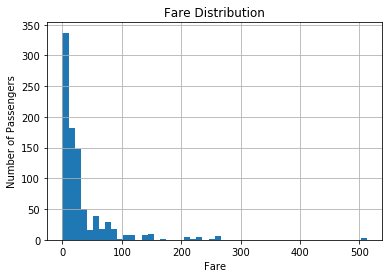

In [11]:
# First let's plot a histogram to get an idea of the distribution

fig = data.Fare.hist(bins=50)
fig.set_title('Fare Distribution')
fig.set_xlabel('Fare')
fig.set_ylabel('Number of Passengers')

The distribution of Fare is skewed, so in principle, we shouldn't estimate outliers using the mean plus minus 3 standard deviations methods, which assumes a normal distribution of the data.

**Box Plot**

Text(0, 0.5, 'Fare')

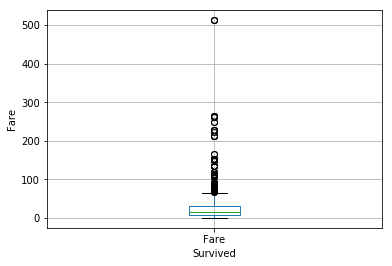

In [12]:
# All the dots in the plot below are outliers according to the quantiles + 1.5 IQR rule

fig = data.boxplot(column='Fare')
fig.set_title('')
fig.set_xlabel('Survived')
fig.set_ylabel('Fare')

**quantiles**

let's look at the values of the quantiles so we can calculate the upper and lower boundaries for the outliers<br>

25%, 50% and 75% in the output below indicate the 25th quantile, median and 75th quantile respectively

In [13]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

**IQR**

Let's calculate the upper and lower boundaries to identify outliers according to interquantile proximity rule

In [14]:
IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)

Lower_fence = data.Fare.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.Fare.quantile(0.75) + (IQR * 1.5)

print(Upper_fence)
print(Lower_fence)
print(IQR)


65.6344
-26.724
23.0896


The upper boundary for extreme outliers is a cost of 65.6 dollars for the Fare. The lower boundary is meaningless because there can't be a negative price for Fare.

In [15]:
# And if we are looking at really extreme values using the interquantile proximity rule

IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)

Lower_fence = data.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = data.Fare.quantile(0.75) + (IQR * 3)

Upper_fence, Lower_fence, IQR

(100.2688, -61.358399999999996, 23.0896)

The upper boundary for extreme outliers is a cost of 100 dollars for the Fare. The lower boundary is meaningless because there can't be a negative price for Fare.

In [16]:
# lets look at the actual number of passengers on the upper Fare ranges

print('total passengers: {}'.format(data.shape[0]))

print('passengers that paid more than 65: {}'.format(
    data[data.Fare > 65].shape[0]))

print('passengers that paid more than 100: {}'.format(
    data[data.Fare > 100].shape[0]))

total passengers: 891
passengers that paid more than 65: 116
passengers that paid more than 100: 53


In [17]:
# percentages of passengers
total_passengers = np.float(data.shape[0])

print('total passengers: {}'.format(data.shape[0] / total_passengers))

print('passengers that paid more than 65: {}'.format(
    data[data.Fare > 65].shape[0] / total_passengers))

print('passengers that paid more than 100: {}'.format(
    data[data.Fare > 100].shape[0] / total_passengers))

total passengers: 1.0
passengers that paid more than 65: 0.13019079685746351
passengers that paid more than 100: 0.05948372615039282


When using the 3 times interquantile range itnerval to find outliers, we find that 6% of the passengers have paid extremely high fares.

**nature of outliers**

In [18]:
# let's create a separate dataframe for high fare payers
high_fare_df = data[data.Fare>100]

In [19]:
# ticket: it indicates the people that bought their fares together
high_fare_df.groupby('Ticket')['Fare'].count()

Ticket
113503      1
113760      4
113781      4
16966       2
17421       4
19950       4
24160       3
35273       3
36928       2
PC 17483    1
PC 17558    2
PC 17569    2
PC 17582    3
PC 17608    2
PC 17611    2
PC 17755    3
PC 17757    4
PC 17758    2
PC 17760    3
PC 17761    2
Name: Fare, dtype: int64

A group of people who bought their tickets together, say they were a family, would have the same ticket number. And the fare attached to them is no longer the individual Fare, rather the group Fare. This is why, we see this unusually high values

In [20]:
multiple_tickets = pd.concat(
    [
        high_fare_df.groupby('Ticket')['Fare'].count(),
        high_fare_df.groupby('Ticket')['Fare'].mean()
    ],
    axis=1)

multiple_tickets.columns = ['Ticket', 'Fare']
multiple_tickets.head(10)

,Ticket,Fare
Ticket,,
113503,1,211.5000
113760,4,120.0000
113781,4,151.5500
16966,2,134.5000
17421,4,110.8833
19950,4,263.0000
24160,3,211.3375
35273,3,113.2750
36928,2,164.8667


In [21]:
# let's have a look at the most extreme outliers
data[data.Fare>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


These three people have the same ticket number, indicating that they were travelling together. The Fare price in this case, 512 is the price of 3 tickets, and not one. This is why, it is unusually high.

### 3.2)-Age